In [15]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [16]:
plt.rcParams['figure.figsize'] = (20, 12)

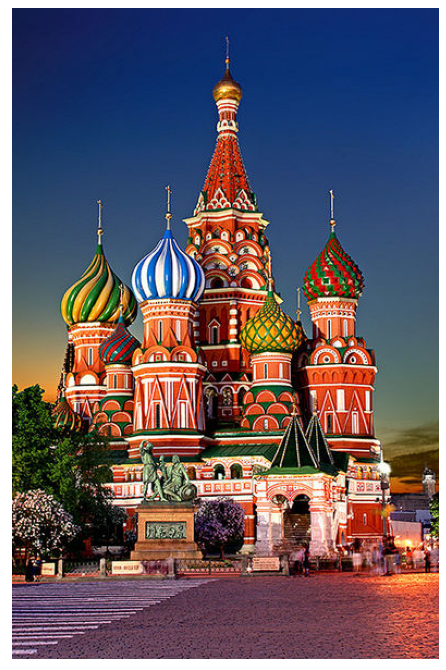

In [17]:
img=io.imread('/content/sample_data/images/1-Saint-Basils-Cathedral.jpg')
ax=plt.axes(xticks=[],yticks=[])

ax.imshow(img);

In [18]:
img.shape

(600, 394, 3)

In [19]:
img_data=(img/255.0).reshape(-1,3)
img_data.shape

(236400, 3)

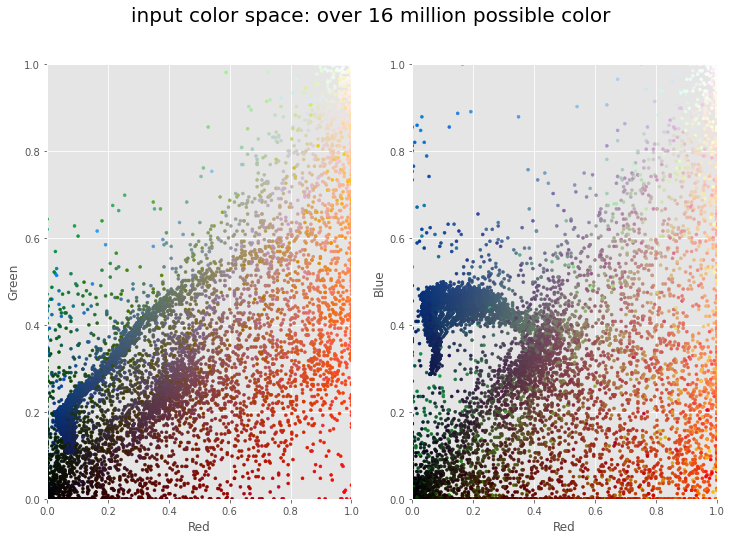

In [20]:
from plot_utils import plot_utils
x=plot_utils(img_data,title="input color space: over 16 million possible color")
x.colorSpace()

In [21]:
from sklearn.cluster import MiniBatchKMeans

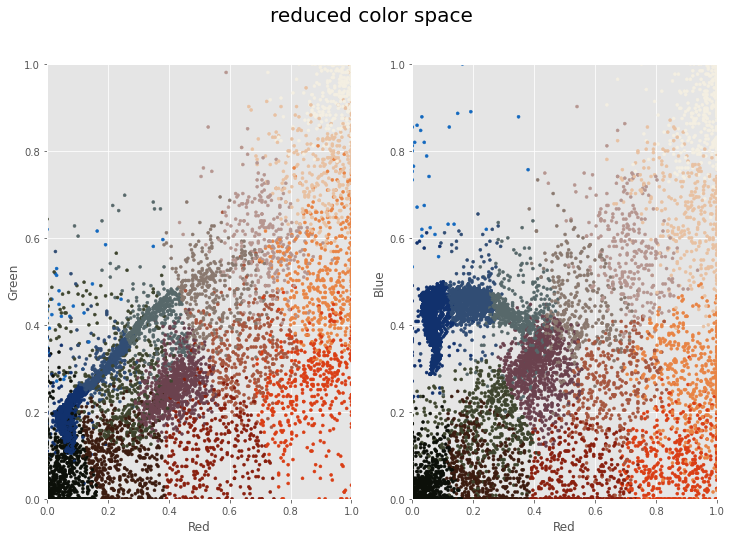

In [22]:
kmeans=MiniBatchKMeans(16).fit(img_data)
k_colors=kmeans.cluster_centers_[kmeans.predict(img_data)]

y=plot_utils(img_data,colors=k_colors,title="reduced color space")
y.colorSpace()

In [23]:
img_dir='/content/sample_data/images'

In [24]:
@interact
def color_compression(image=os.listdir(img_dir),k=IntSlider(min=1,max=256,step=1,value=16,
                                                            continuous_update=False,
                                                            layout=dict(width='100%'))):
                                                                                                                              
      input_img=io.imread(img_dir+'/'+image)
      img_data=(input_img/255.0).reshape(-1,3)
      kmeans=MiniBatchKMeans(k).fit(img_data)
      k_colors=kmeans.cluster_centers_[kmeans.predict(img_data)]                                                                                                                        
      k_img=np.reshape(k_colors,(input_img.shape))                                                                                                                     
      
      fig,(ax1,ax2)=plt.subplots(1,2)
      fig.suptitle('kmeans image compression',fontsize=20)
      ax1.set_title('compressed')
      ax1.set_xticks([])
      ax1.set_yticks([])
      ax1.imshow(k_img)
                                                                        
      ax2.set_title('original (16,777,216 colors)')
      ax2.set_xticks([])
      ax2.set_yticks([]) 
      ax2.imshow(input_img) 
      plt.subplots_adjust(top=0.85)
      plt.show()

interactive(children=(Dropdown(description='image', options=('4-GoldenGateBridge.jpg', '2-new-york-skyline.jpg…